In [9]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
IMAGE_SIZE = 48
BATCH_SIZE = 32

class_names = ['cardboard', 'glass', 'metal', 'other', 'paper', 'plastic']

( p_dataset,
  q_dataset, ) = tf.keras.utils.image_dataset_from_directory('../data/',
                    batch_size=(BATCH_SIZE),
                    image_size=(IMAGE_SIZE, IMAGE_SIZE),
                    seed=0,
                    subset='both',
                    validation_split=0.2)

Found 286 files belonging to 2 classes.
Using 229 files for training.
Using 57 files for validation.


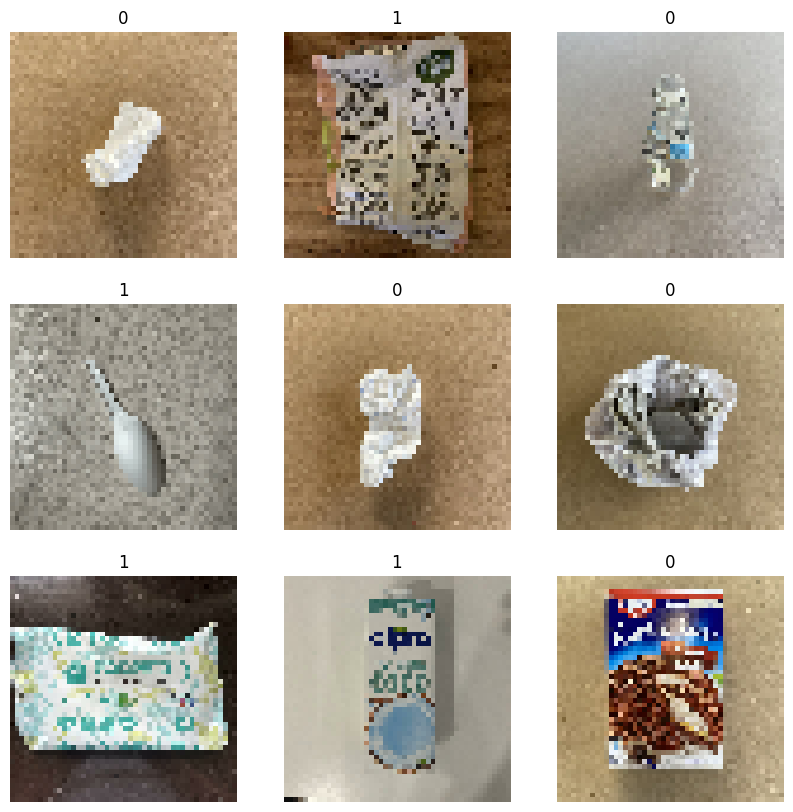

In [12]:
plt.figure(figsize=(10, 10))

for images, labels in p_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i].numpy())
        plt.axis("off")

In [13]:
# define
model = tf.keras.models.Sequential([
    tf.keras.Input((IMAGE_SIZE, IMAGE_SIZE, 3)),
    
    # augumentation
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip(),
    
    # conv2 #1
    tf.keras.layers.Conv2D(24, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(24, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    
    # conv2 #2
    tf.keras.layers.Conv2D(48, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(48, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),

    # dense #1
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # output
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax(),
])

# compile
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# preview
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRot  (None, 48, 48, 3)         0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 48, 48, 3)         0         
                                                                 
 random_flip (RandomFlip)    (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 24)        672       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 24)        5208      
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 24)        0         
 D)                                                     

In [14]:
model.fit(p_dataset, validation_data=q_dataset, epochs=25)

Epoch 1/25
8/8 [==============================] - 6s 239ms/step - loss: 69.3612 - accuracy: 0.4454 - val_loss: 5.8284 - val_accuracy: 0.6667
Epoch 2/25
8/8 [==============================] - 4s 194ms/step - loss: 5.0456 - accuracy: 0.5415 - val_loss: 0.6552 - val_accuracy: 0.6316
Epoch 3/25
8/8 [==============================] - 4s 184ms/step - loss: 1.1611 - accuracy: 0.5546 - val_loss: 0.6125 - val_accuracy: 0.6491
Epoch 4/25
8/8 [==============================] - 4s 190ms/step - loss: 0.7232 - accuracy: 0.5808 - val_loss: 0.6715 - val_accuracy: 0.7018
Epoch 5/25
8/8 [==============================] - 4s 226ms/step - loss: 0.6264 - accuracy: 0.6856 - val_loss: 0.4875 - val_accuracy: 0.7193
Epoch 6/25
8/8 [==============================] - 4s 210ms/step - loss: 0.6907 - accuracy: 0.5852 - val_loss: 0.5027 - val_accuracy: 0.8070
Epoch 7/25
8/8 [==============================] - 4s 189ms/step - loss: 0.5027 - accuracy: 0.7729 - val_loss: 0.5095 - val_accuracy: 0.7193
Epoch 8/25
8/8 [===

In [ ]:
model.save('ThrashRecognitionML.v1.ipynb.keras')